# **Space X  Falcon 9 First Stage Landing Prediction**


# NoteBook 2: Exploratory Data Analysis


With the acquired dataset `dataset1-from-api.csv` in hand, this is the second chapter `EDA` whereby some Exploratory Data Analysis will be performed to find some patterns in the data and determine what would be the label for training supervised models. 

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, `True Ocean` means the mission outcome was successfully  landed to a specific region of the ocean while `False Ocean` means the mission outcome was unsuccessfully landed to a specific region of the ocean. `True RTLS` means the mission outcome was successfully  landed to a ground pad `False RTLS` means the mission outcome was unsuccessfully landed to a ground pad.`True ASDS` means the mission outcome was successfully landed on  a drone ship `False ASDS` means the mission outcome was unsuccessfully landed on a drone ship. 

In this notebook these outcomes will be mainly converted into Training Labels with `1` means the booster successfully landed and `0` means it was unsuccessful.


## Objectives
Perform exploratory  Data Analysis, determine Training Labels and Feature Engineering

- Exploratory Data Analysis
- Determine Training Labels
- Preparing Data Feature Engineering 


----


## Import Libraries


In [1]:
import pandas as pd  # for data manipulation and analysis.
import numpy as np   # for large, multi-dimensional arrays and matrices operations

import matplotlib.pyplot as plt  # for plotting data
import seaborn as sns  # data visualization library based on matplotlib

### Exploratory Data Analysis


Load Space X dataset, from last section `data_acquisition.ipynb`


In [2]:
df = pd.read_csv('data/dataset1-from-api.csv')
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute.
There should be no missing values in the dataset except for in `LandingPad`


In [3]:
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

Identify which columns are numerical and categorical:


In [4]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

### Calculate the number of launches on each site

The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column `LaunchSite`

Find the number of launches for each site.


In [5]:
# Apply value_counts on LaunchSite column
df['LaunchSite'].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

Each launch aims to a dedicated orbit, and here are some common orbit types:




* <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01'>[1]</a>.

* <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01'>[2]</a>.


* <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01" >[3] </a>.


* <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">[4] </a>.
    
    
    
* <b>ES-L1 </b>: At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01#L1_point">[5]</a> .
    
    
* <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">[6]</a>.


* <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01"> [7] </a>


* <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01"> [8] </a>


* <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01"> [9] </a>


* <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01"> [10] </a>


* <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth) <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01"> [11] </a>

some are shown in the following plot:


![Orbits Images](images/orbits.png)

### Calculate the number and occurrence of each orbit


In [6]:
# Apply value_counts on Orbit column
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

### Calculate the number and occurence of mission outcome of the orbits


Use the method `.value_counts`() on the column `Outcome` to determine the number of `landing_outcomes`.Then assign it to a variable landing_outcomes.


In [7]:
landing_outcome = df['Outcome'].value_counts()
landing_outcome

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

`True Ocean` means the mission outcome was successfully  landed to a specific region of the ocean while `False Ocean` means the mission outcome was unsuccessfully landed to a specific region of the ocean. `True RTLS` means the mission outcome was successfully  landed to a ground pad `False RTLS` means the mission outcome was unsuccessfully landed to a ground pad. `True ASDS` means the mission outcome was successfully  landed to a drone ship `False ASDS` means the mission outcome was unsuccessfully landed to a drone ship. `None ASDS` and `None None` these represent a failure to land.


In [8]:
# Check which keys represent successful and unsuccessful landing

for i, outcome in enumerate(landing_outcome.keys()):
    print(i, outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


Create a set of outcomes where landing was unsuccessful


In [9]:
# These [1,3,5,6,7] represent the unsuccessful ones

bad_outcome = set(landing_outcome.keys()[[1,3,5,6,7]])
bad_outcome

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

Using the `Outcome`,  create a list where the element is zero if the corresponding  row  in `Outcome` is in the set `bad_outcome`; otherwise, it's one. Then assign it to the variable `landing_class`


In [10]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise
landing_class = []
for outcome in df['Outcome']:
    if outcome in bad_outcome:
        landing_class.append(0)
    else:
        landing_class.append(1)
print(landing_class)  


[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the  first stage did not land successfully; one means  the first stage landed Successfully 


In [11]:
df['Class'] = landing_class
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Determine  the success rate


In [12]:
df['Class'].mean()

0.6666666666666666

### Explore Relationship between features

First, try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the `FlightNumber` vs. `PayloadMass` and overlay the outcome of the launch. As the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


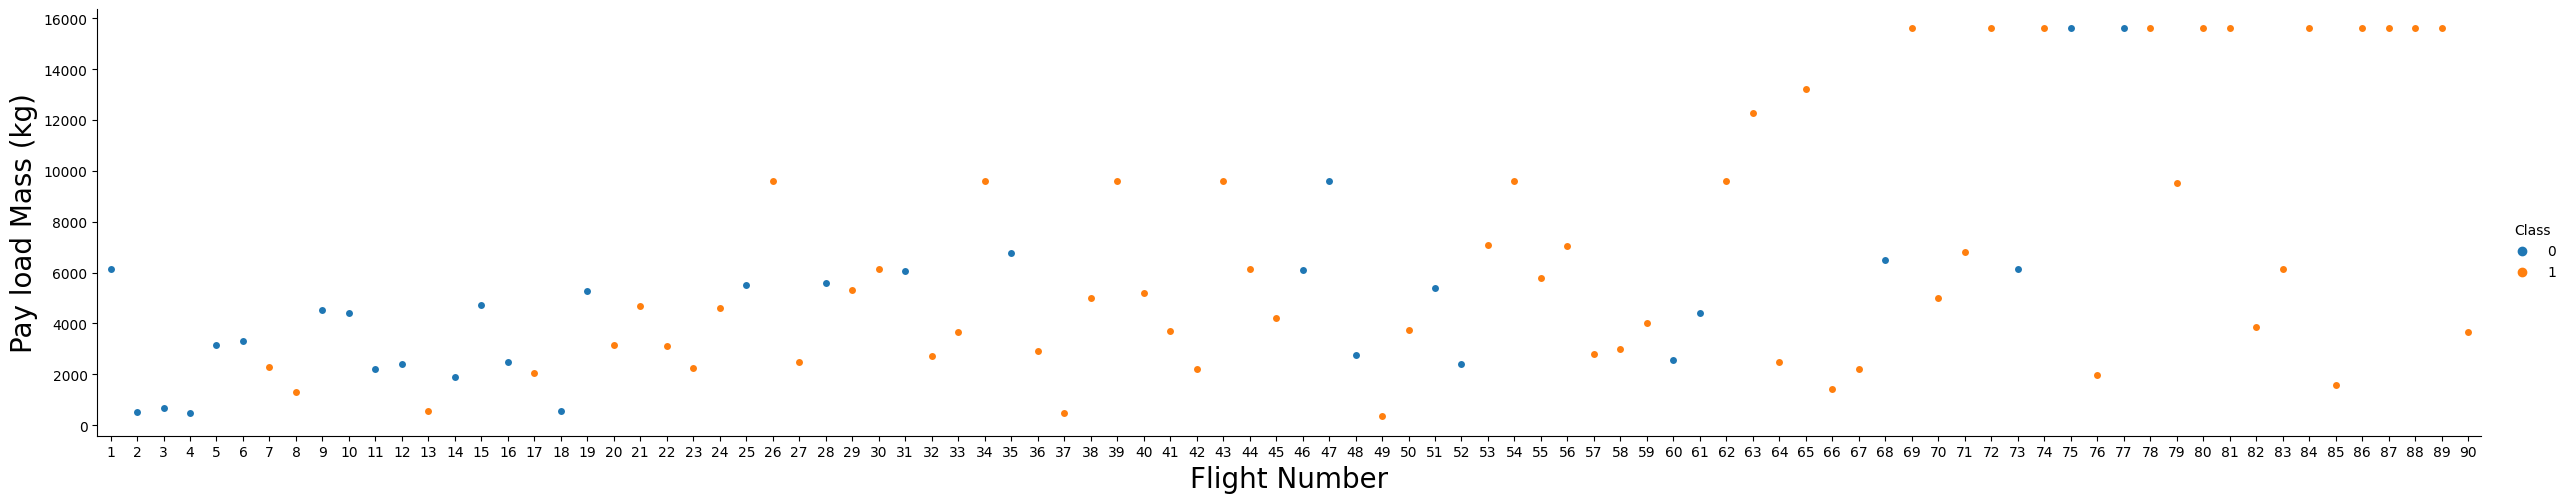

In [13]:
# Cat plot chart with x axis to be Flight Number and y axis to be the PayloadMass, and hue to be the class value
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

<b>Visualize the relationship between `Flight Number` and `Launch Sites`</b>


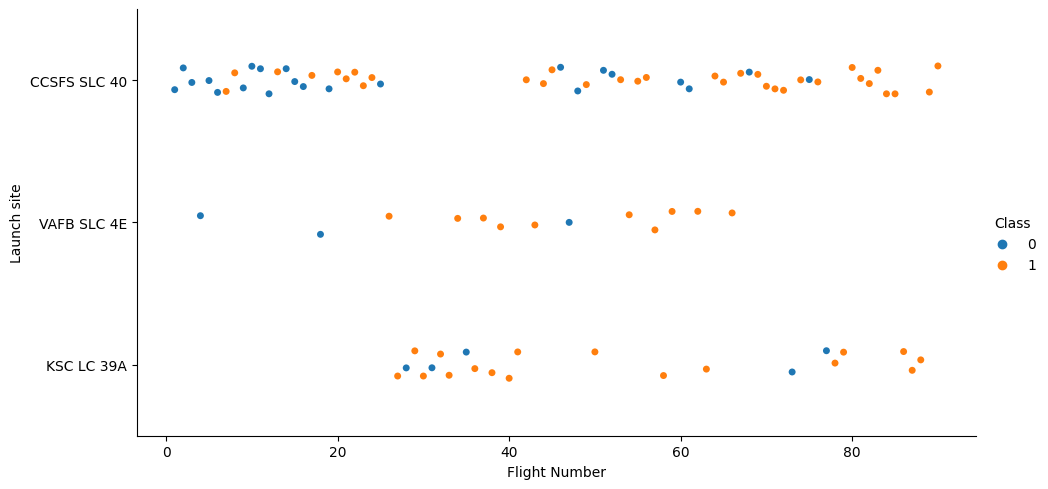

In [14]:
# Scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x='FlightNumber', y='LaunchSite', data=df, hue="Class",aspect=2)
plt.xlabel("Flight Number")
plt.ylabel('Launch site')
plt.show()

 As the number of flights increases, the rate of success at a launch site increases.
- Most of the early flights (flight numbers < 30) were launched from CCAFS SLC 40, and were generally unsuccessful.
- The flights from VAFB SLC4E also show this trend, that earlier flights were less successful.
- No early flights were launched from KSCLC 39A, so the launches from this site are more successful.

<b>Visualize the relationship between `Payload` and `Launch Sites`</b>


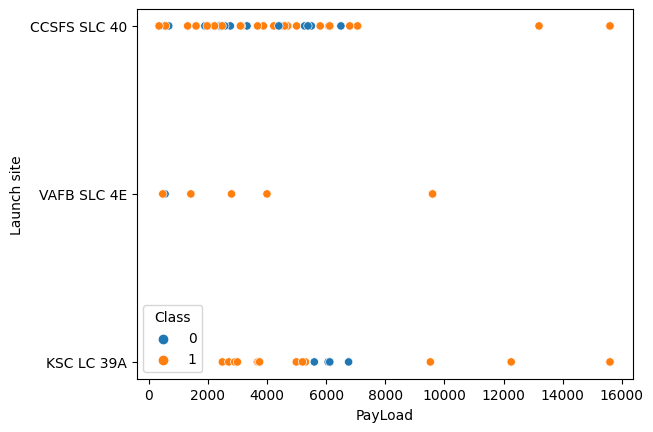

In [15]:
# Scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x='PayloadMass', y='LaunchSite', data=df, hue="Class")
plt.xlabel("PayLoad")
plt.ylabel('Launch site')
plt.show()

Observe Payload Vs. Launch Site scatter point chart, for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


<b>Visualize the relationship between `success rate` of each `orbit type`</b>

C:\Users\Farah\AppData\Local\Temp\ipykernel_9548\3787691362.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_orbitsuccess = df.groupby('Orbit').mean().reset_index()


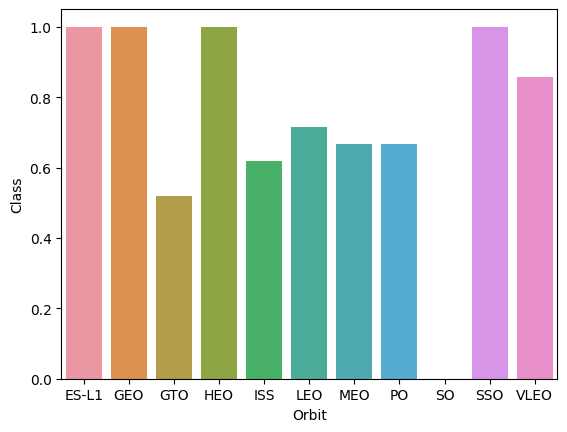

In [16]:
# Groupby Orbit column and get the mean of Class column
df_orbitsuccess = df.groupby('Orbit').mean().reset_index()

sns.barplot(data=df_orbitsuccess, x='Orbit', y='Class')
plt.show()

The bar chart of Success Rate vs. Orbit Type shows that the following orbits have the highest (100%) success rate:
- ES-L1 (Earth-Sun First Lagrangian Point)
- GEO (Geostationary Orbit)
- HEO (High Earth Orbit)
- SSO (Sun-synchronous Orbit)

The orbit with the lowest (0%) success rate is:
- SO (Heliocentric Orbit)

<b>Visualize the relationship between `FlightNumber` and `Orbit type`</b>


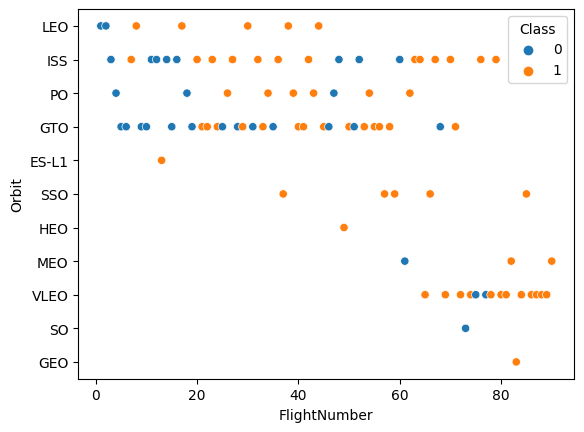

In [17]:
# Scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.show()

In the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.
- The 100% success rate of GEO, HEO, and ES-L1 orbits can be explained by only having 1 flight into the respective orbits.
- The 100% success rate in SSOis moreimpressive, with 5 successful flights.
- There is little relationship between Flight Number and Success Rate for GTO


<b>Visualize the relationship between `Payload` and `Orbit type`</b>


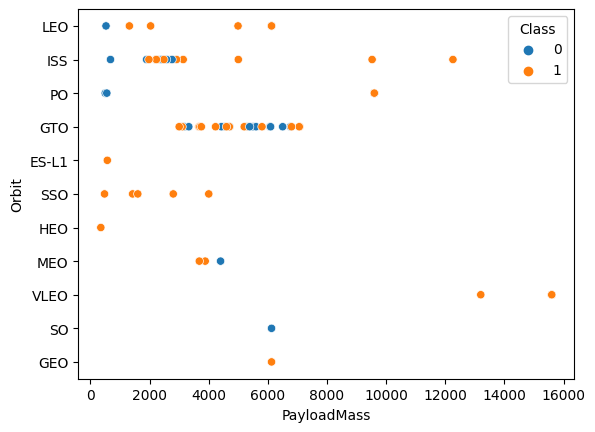

In [18]:
# Scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.show()

With heavy payloads the successful landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both successful and unsuccessful landings are mixed up with an increase in payloadMass

<b>Visualize the launch success `yearly trend`</b>


The function will help in getting the year from the date


In [19]:
# A function to Extract years from the date 
year=[]
def get_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

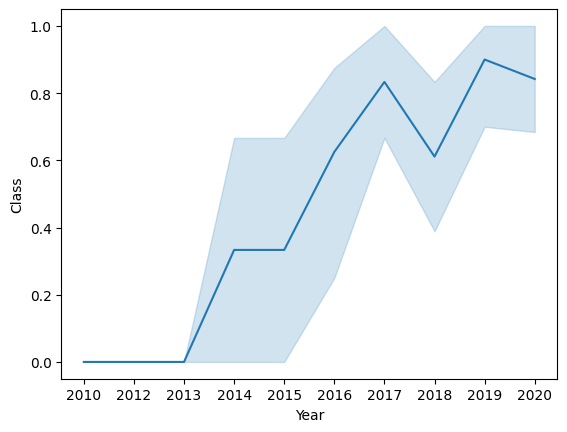

In [20]:
# line chart with x axis to be the extracted year and y axis to be the success rate
df['Year'] = get_year('Date')
sns.lineplot(data=df, x='Year', y='Class')
plt.show()

Observation made:
- Between 2010 and 2013, all landings were unsuccessful (as the success rate is 0).
- After 2013, the success rate generally increased, despite small dips in 2018 and 2020.
- After 2016, there was always a greater than 50% chance of success.


## Features Engineering 


By now, some preliminary insights  were obtained about how each important variable would affect the success rate. The features that will be used in success prediction in the future module are selected below.


In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Class']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,0
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,0
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,0


Create dummy variables to categorical columns

Apply OneHotEncoder to the columns `Orbits`, `LaunchSite`, `LandingPad`, and `Serial`. Assign the value to the variable `features_one_hot`. Result dataframe must include all features including the encoded ones.


In [22]:
features_one_hot = pd.get_dummies(features)
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,True,True,True,5.0,12,1,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15600.000000,3,True,True,True,5.0,13,1,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15600.000000,6,True,True,True,5.0,12,1,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15600.000000,3,True,True,True,5.0,12,1,0,...,0,0,0,0,0,0,0,0,1,0


Cast all numeric columns to `float64`

Now that the `features_one_hot` dataframe only contains numbers cast the entire dataframe to variable type `float64`



In [23]:
features_one_hot = features_one_hot.astype('Float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Export the new dataframe to a <b>CSV</b> `dataset-from-eda.csv` inside the `data` folder for the next section of the Project

In [24]:
features_one_hot.to_csv('data/dataset2-after-eda.csv', index=False)

--End of Notebook--

# Next Steps:

Exploratory Data Analysis, Determining Training Labels and Feature Engineering were done in this notebook.

Next, finding some geographical patterns about launch sites:

    -  Mark all launch sites on a map
    -  Mark the success/failed launches for each site on the map
    -  Calculate the distances between a launch site to its proximities


-- Next: **Notebook 3** `launch_site_analysis.ipynb` --

----